In [176]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 15

# All score DataFrame
results = pd.DataFrame([],columns=['Accuracy Score','Train Accuracy'])

In [179]:
# load dataset
df_test = pd.read_csv("./datasets/blood_samples_test_dataset.csv")
df_test

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.001827,0.033693,0.114755,0.997927,0.562604,0.866499,0.578042,0.914615,0.026864,0.038641,...,0.653230,0.186104,0.430398,0.016678,0.885352,0.652733,0.788235,0.054788,0.031313,Thalasse
1,0.436679,0.972653,0.084998,0.180909,0.675736,0.563889,0.798382,0.670361,0.376092,0.184890,...,0.833540,0.153001,0.458533,0.401845,0.635969,0.574425,0.047025,0.607985,0.594123,Diabetes
2,0.545697,0.324815,0.584467,0.475748,0.558596,0.661007,0.934056,0.381782,0.500342,0.531829,...,0.678901,0.220479,0.817151,0.690981,0.101633,0.855740,0.551124,0.413294,0.070909,Heart Di
3,0.172994,0.050351,0.736000,0.782022,0.069435,0.085219,0.032907,0.460619,0.785448,0.491495,...,0.381500,0.459396,0.420154,0.798537,0.399236,0.324600,0.499504,0.436662,0.242766,Diabetes
4,0.758534,0.739968,0.597868,0.772683,0.875720,0.860265,0.486189,0.486686,0.621048,0.191756,...,0.993381,0.272338,0.663579,0.265227,0.918847,0.804910,0.571119,0.188368,0.750848,Heart Di
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038,Diabetes
482,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804,Heart Di
483,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874,Anemia
484,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526,Diabetes


In [180]:
df_test.columns

Index(['Glucose', 'Cholesterol', 'Hemoglobin', 'Platelets',
       'White Blood Cells', 'Red Blood Cells', 'Hematocrit',
       'Mean Corpuscular Volume', 'Mean Corpuscular Hemoglobin',
       'Mean Corpuscular Hemoglobin Concentration', 'Insulin', 'BMI',
       'Systolic Blood Pressure', 'Diastolic Blood Pressure', 'Triglycerides',
       'HbA1c', 'LDL Cholesterol', 'HDL Cholesterol', 'ALT', 'AST',
       'Heart Rate', 'Creatinine', 'Troponin', 'C-reactive Protein',
       'Disease'],
      dtype='object')

In [181]:
df_test['Disease']=df_test['Disease'].replace('Heart Di','Heart Disease')
df_test['Disease'].unique()

array(['Thalasse', 'Diabetes', 'Heart Disease', 'Anemia', 'Thromboc',
       'Healthy'], dtype=object)

In [182]:
df_train = pd.read_csv("./datasets/blood_samples_train_dataset.csv")
df_train['Disease']=df_train['Disease'].replace('Heart Di','Heart Disease')
df_train['Disease'].unique()

array(['Thalasse', 'Diabetes', 'Heart Disease', 'Anemia', 'Thromboc',
       'Healthy'], dtype=object)

In [186]:
data = pd.concat([df_train,df_test],ignore_index=True)
data.shape # (rows, columns)

(5486, 25)

In [187]:
data.Disease.value_counts()

Disease
Diabetes         3292
Anemia            969
Thalasse          532
Heart Disease     467
Thromboc          169
Healthy            57
Name: count, dtype: int64

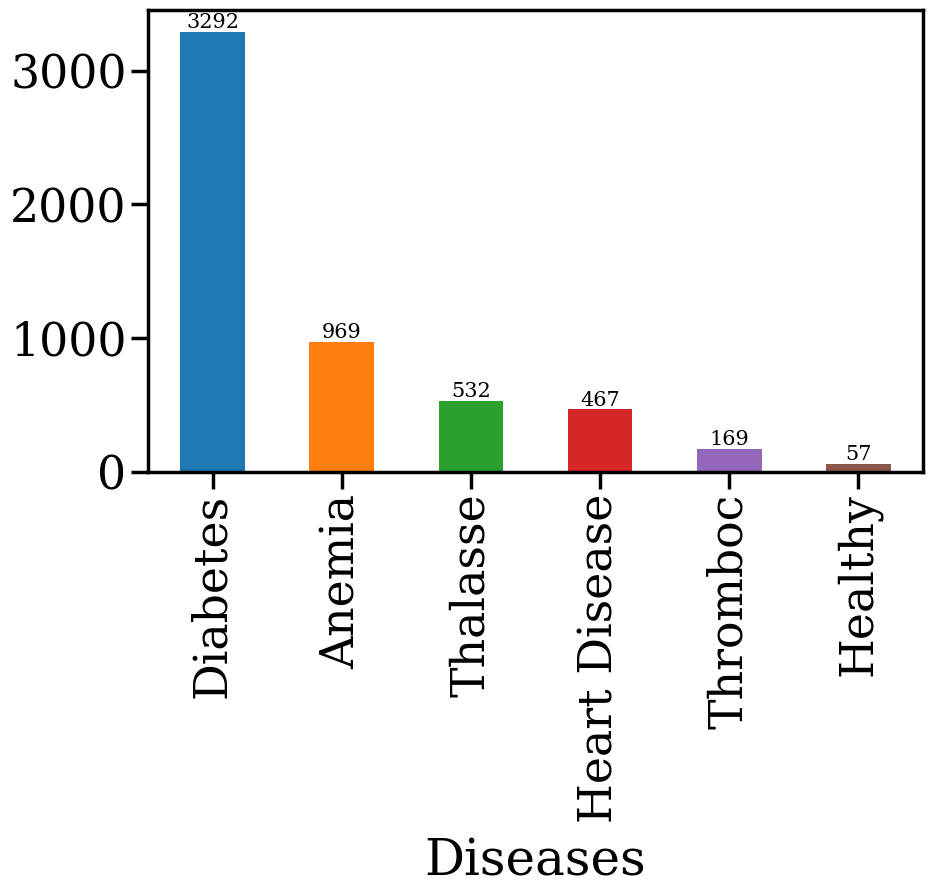

In [189]:
# Let's find how many of each class there are in the bar chart.
counts = data[data.columns[-1]].value_counts()
palette = sns.color_palette()
fig, axes = plt.subplots(figsize=(10,6))
counts.plot(kind="bar", ax=axes, color=palette)
plt.xlabel('Diseases',labelpad=10)
for container in axes.containers:
    axes.bar_label(container)
plt.show()

In [191]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve
def predictor(model_name, xtrain, xtest, ytrain, ytest):    
    print("For the {}".format(model_name)) 
    print("")
    model_name.fit(xtrain,ytrain)    
    y_pred_train = model_name.predict(xtrain)    
    y_pred_test = model_name.predict(xtest)
    test_accuracy = accuracy_score(ytest,y_pred_test)
    train_accuracy = accuracy_score(ytrain,y_pred_train)
    print("The TRAIN accuracy is",train_accuracy)    
    print("--"*50)    
    print("The TEST accuracy is",test_accuracy)
    return test_accuracy, train_accuracy

In [192]:
from sklearn.preprocessing import StandardScaler
def standardization(xtrain, xtest):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(xtrain)
    X_test_scaled = scaler.transform(xtest)
    return X_train_scaled, X_test_scaled

In [193]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

label=LabelEncoder()
data['Disease']=label.fit_transform(data['Disease'])
disease=data['Disease']
features=data.drop('Disease',axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(features,disease,test_size=0.2,random_state=42)

In [194]:
from sklearn.linear_model import LogisticRegression
# standardization
X_train_scaled, X_test_scaled = standardization(xtrain, xtest)
# Create model
logmodel = LogisticRegression(max_iter= 1000, solver = 'saga', penalty= 'l1', random_state = 10, C = 1.0, multi_class = 'multinomial')
test_accuracy, train_accuracy = predictor(logmodel, X_train_scaled, X_test_scaled, ytrain, ytest)
results.loc['LogisticRegression Model'] = [test_accuracy,train_accuracy]

For the LogisticRegression(max_iter=1000, multi_class='multinomial', penalty='l1',
                   random_state=10, solver='saga')

The TRAIN accuracy is 0.6055150410209663
----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.5892531876138434


In [195]:
results

,Accuracy Score,Train Accuracy
LogisticRegression Model,0.589253,0.605515
